In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('/Users/romainlejeune/Desktop/Python/Random files/heart_failure_clinical_records_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
""" Workflow : 
- Exploration et nettoyage des données
- Visualisation des données
- Preprocessing / Pipeline
- Split des données
- Entrainement du modèle
- Evaluation du modèle
- Optimisation du modèle et interprétabilité
"""

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Visualisation

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

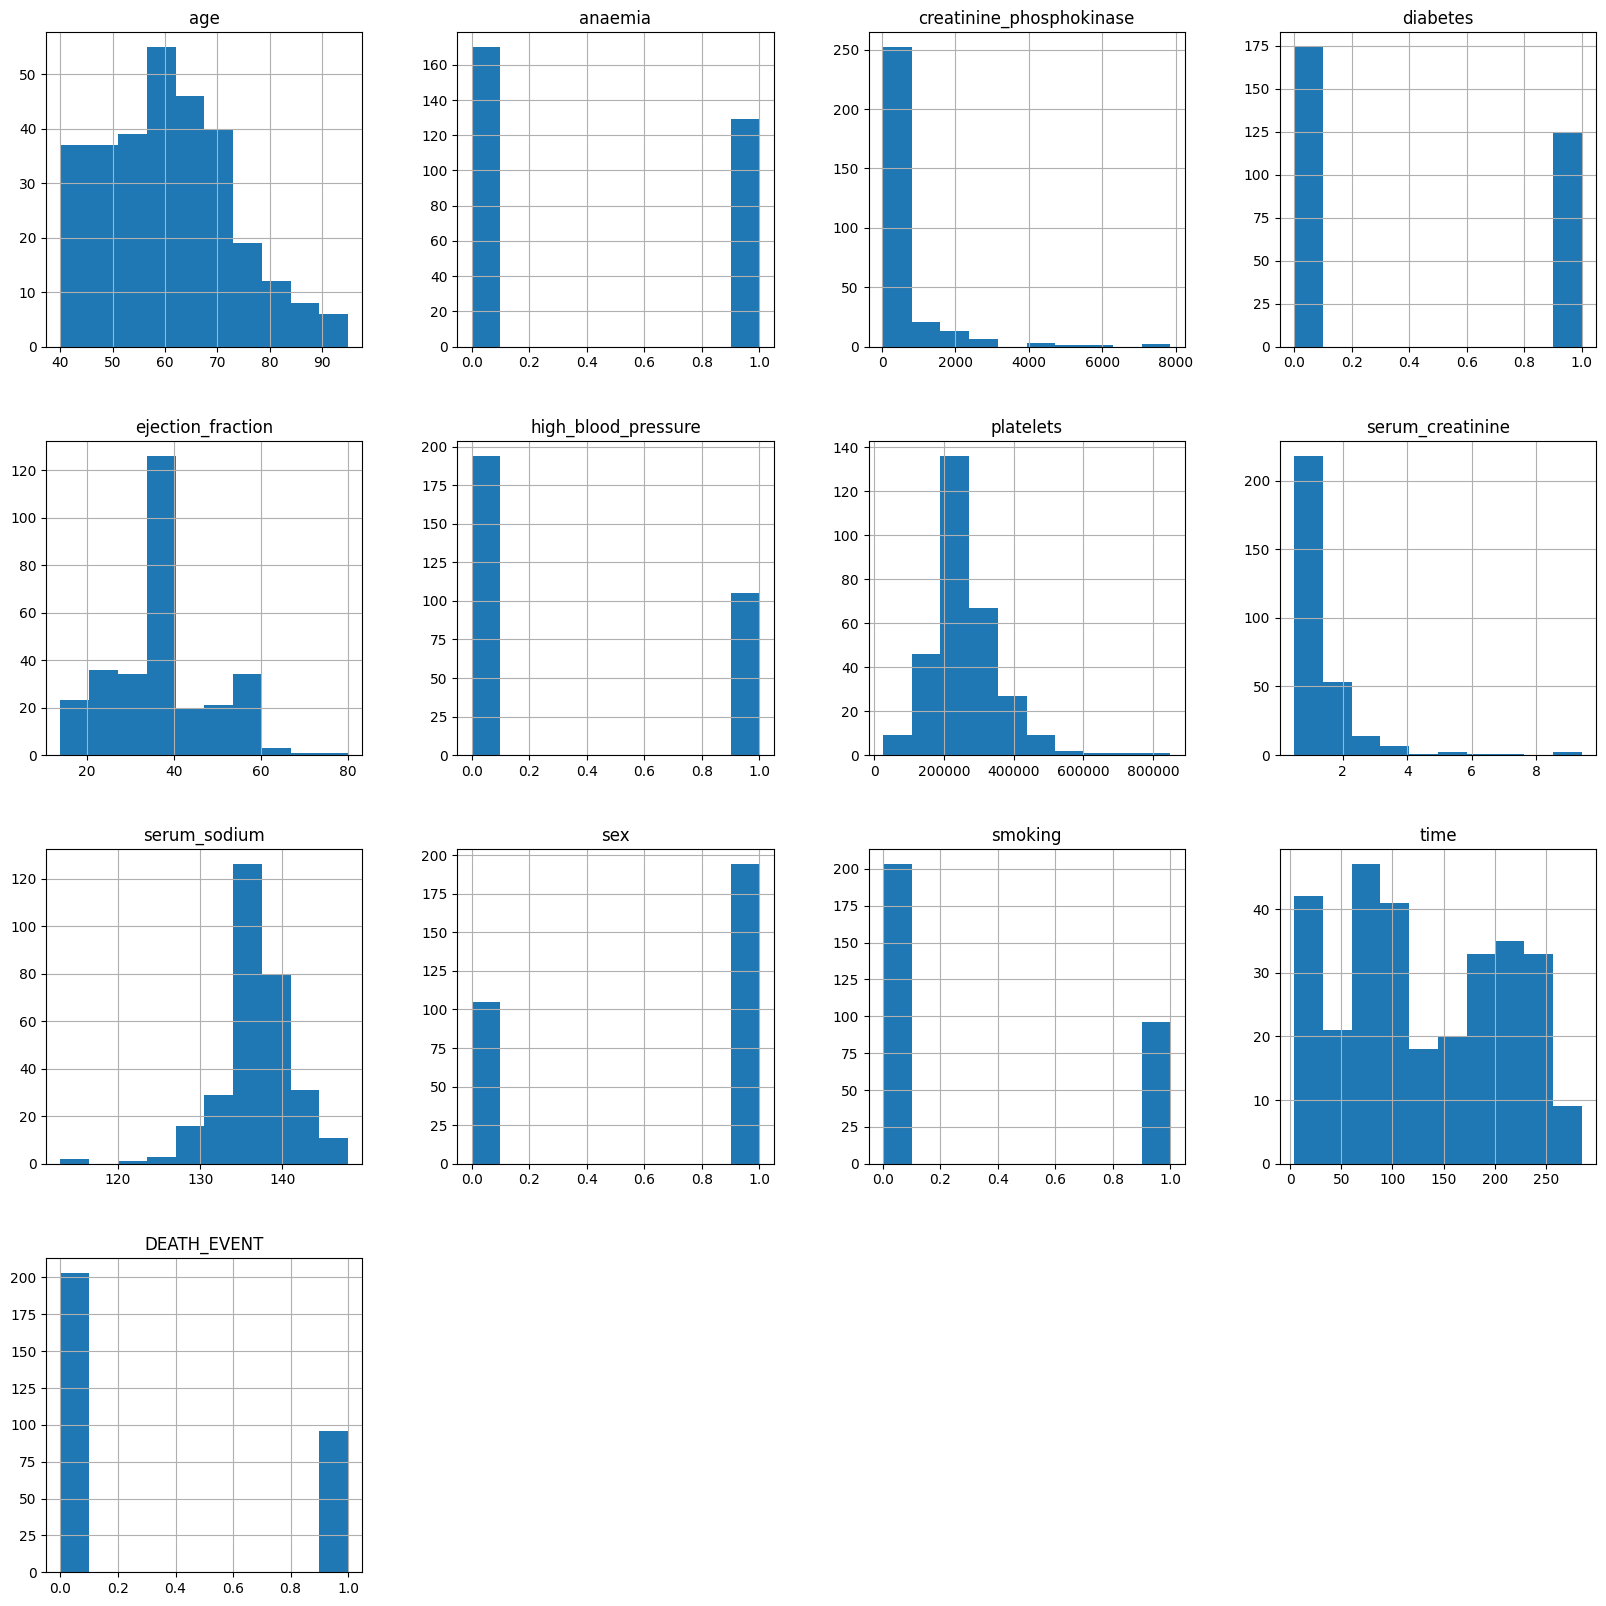

In [10]:
df.hist(figsize=(20, 20))

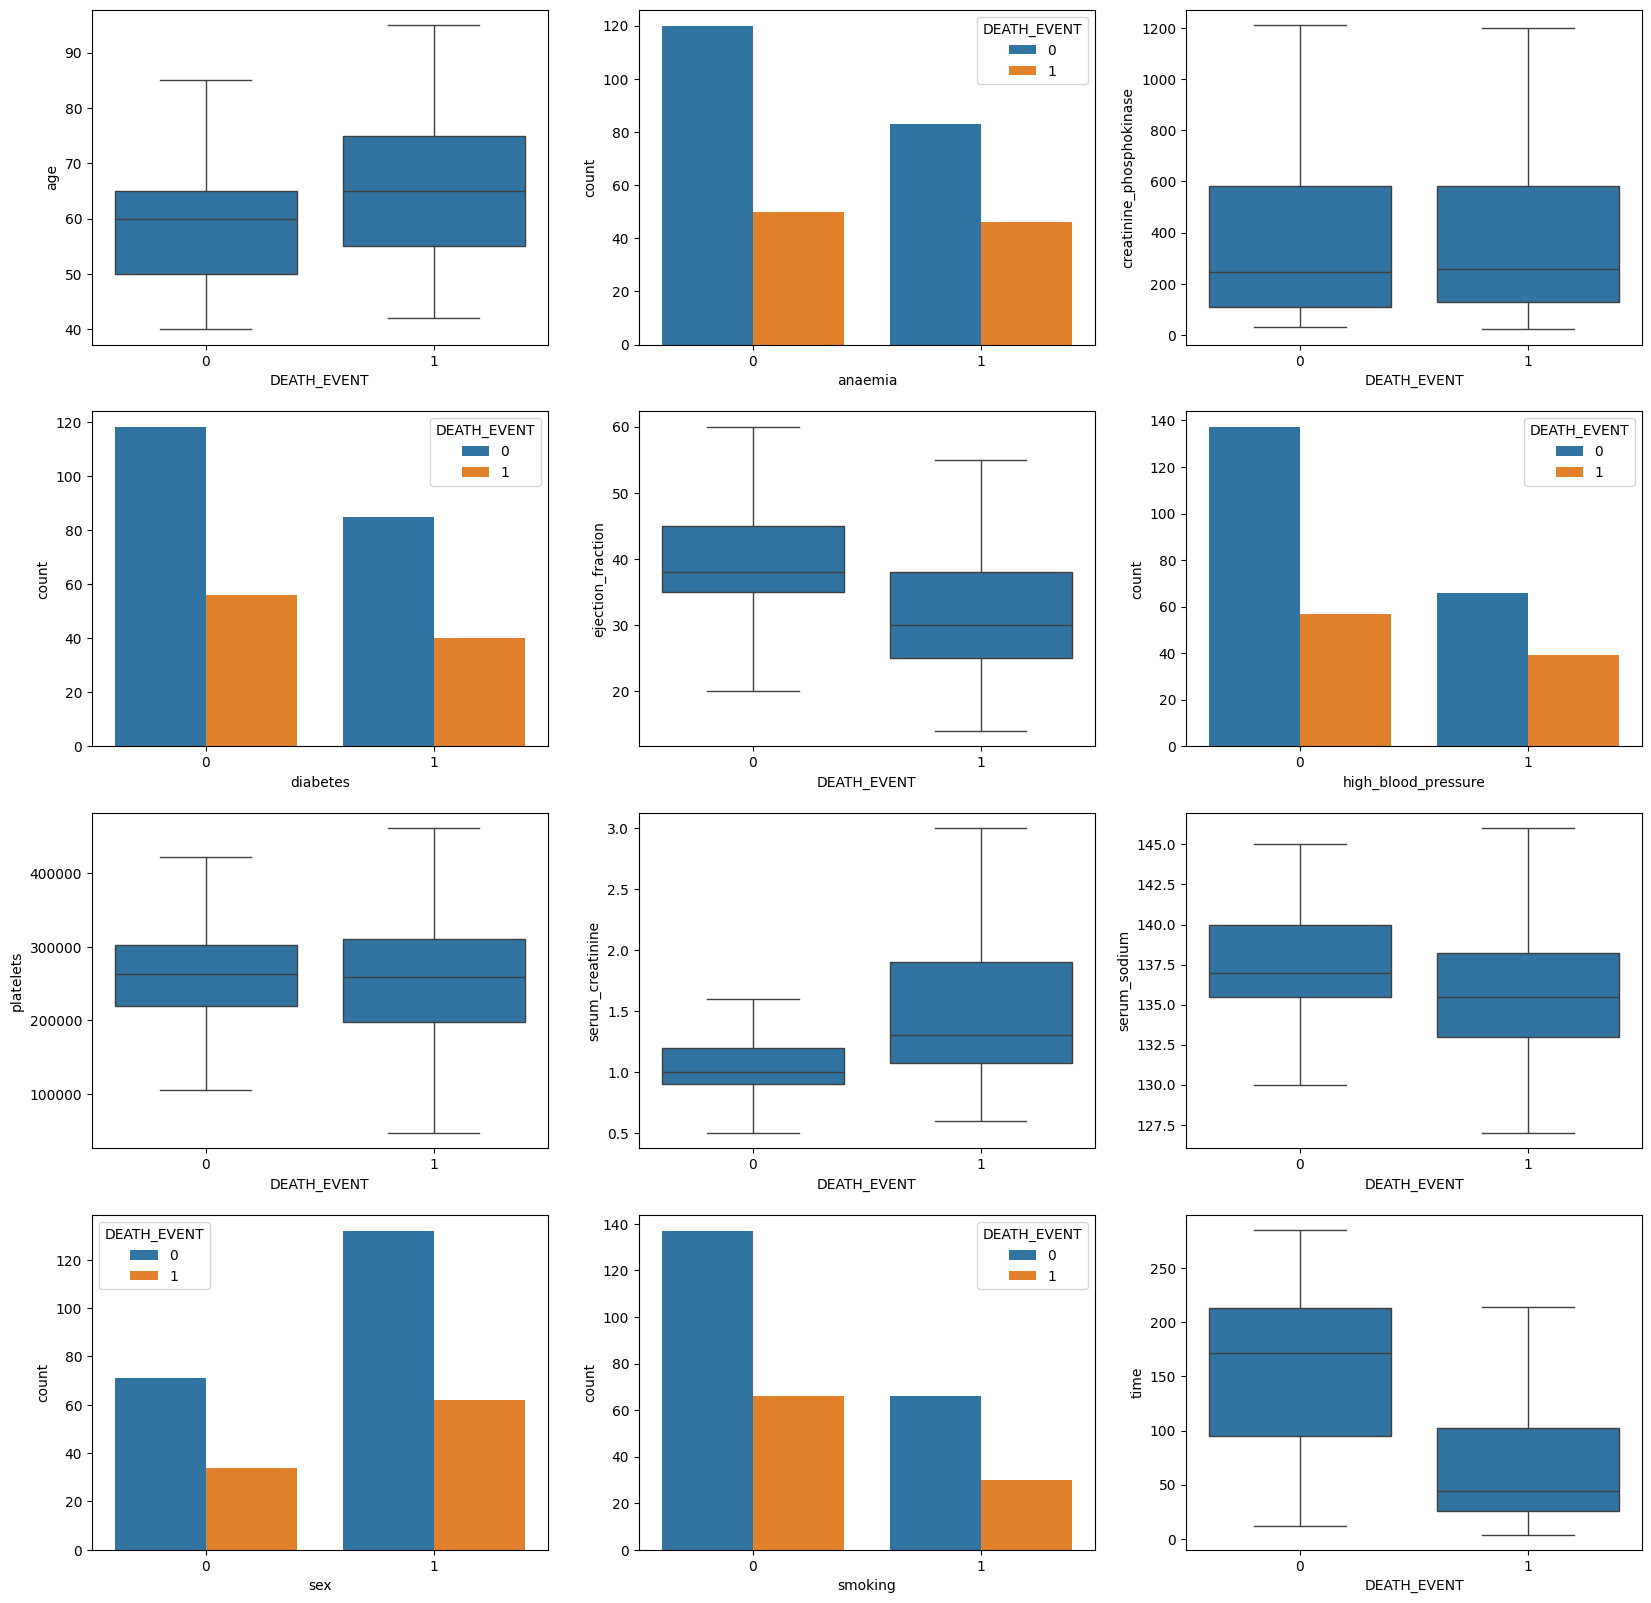

In [13]:
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
for i in range(0,12):
    plt.subplot(4,3,i+1)
    if df.columns[i] in binary_features:
        sns.countplot(x=df.columns[i], data=df, hue='DEATH_EVENT')
    else:
        sns.boxplot(x='DEATH_EVENT', y=df.columns[i], data=df, showfliers=False)

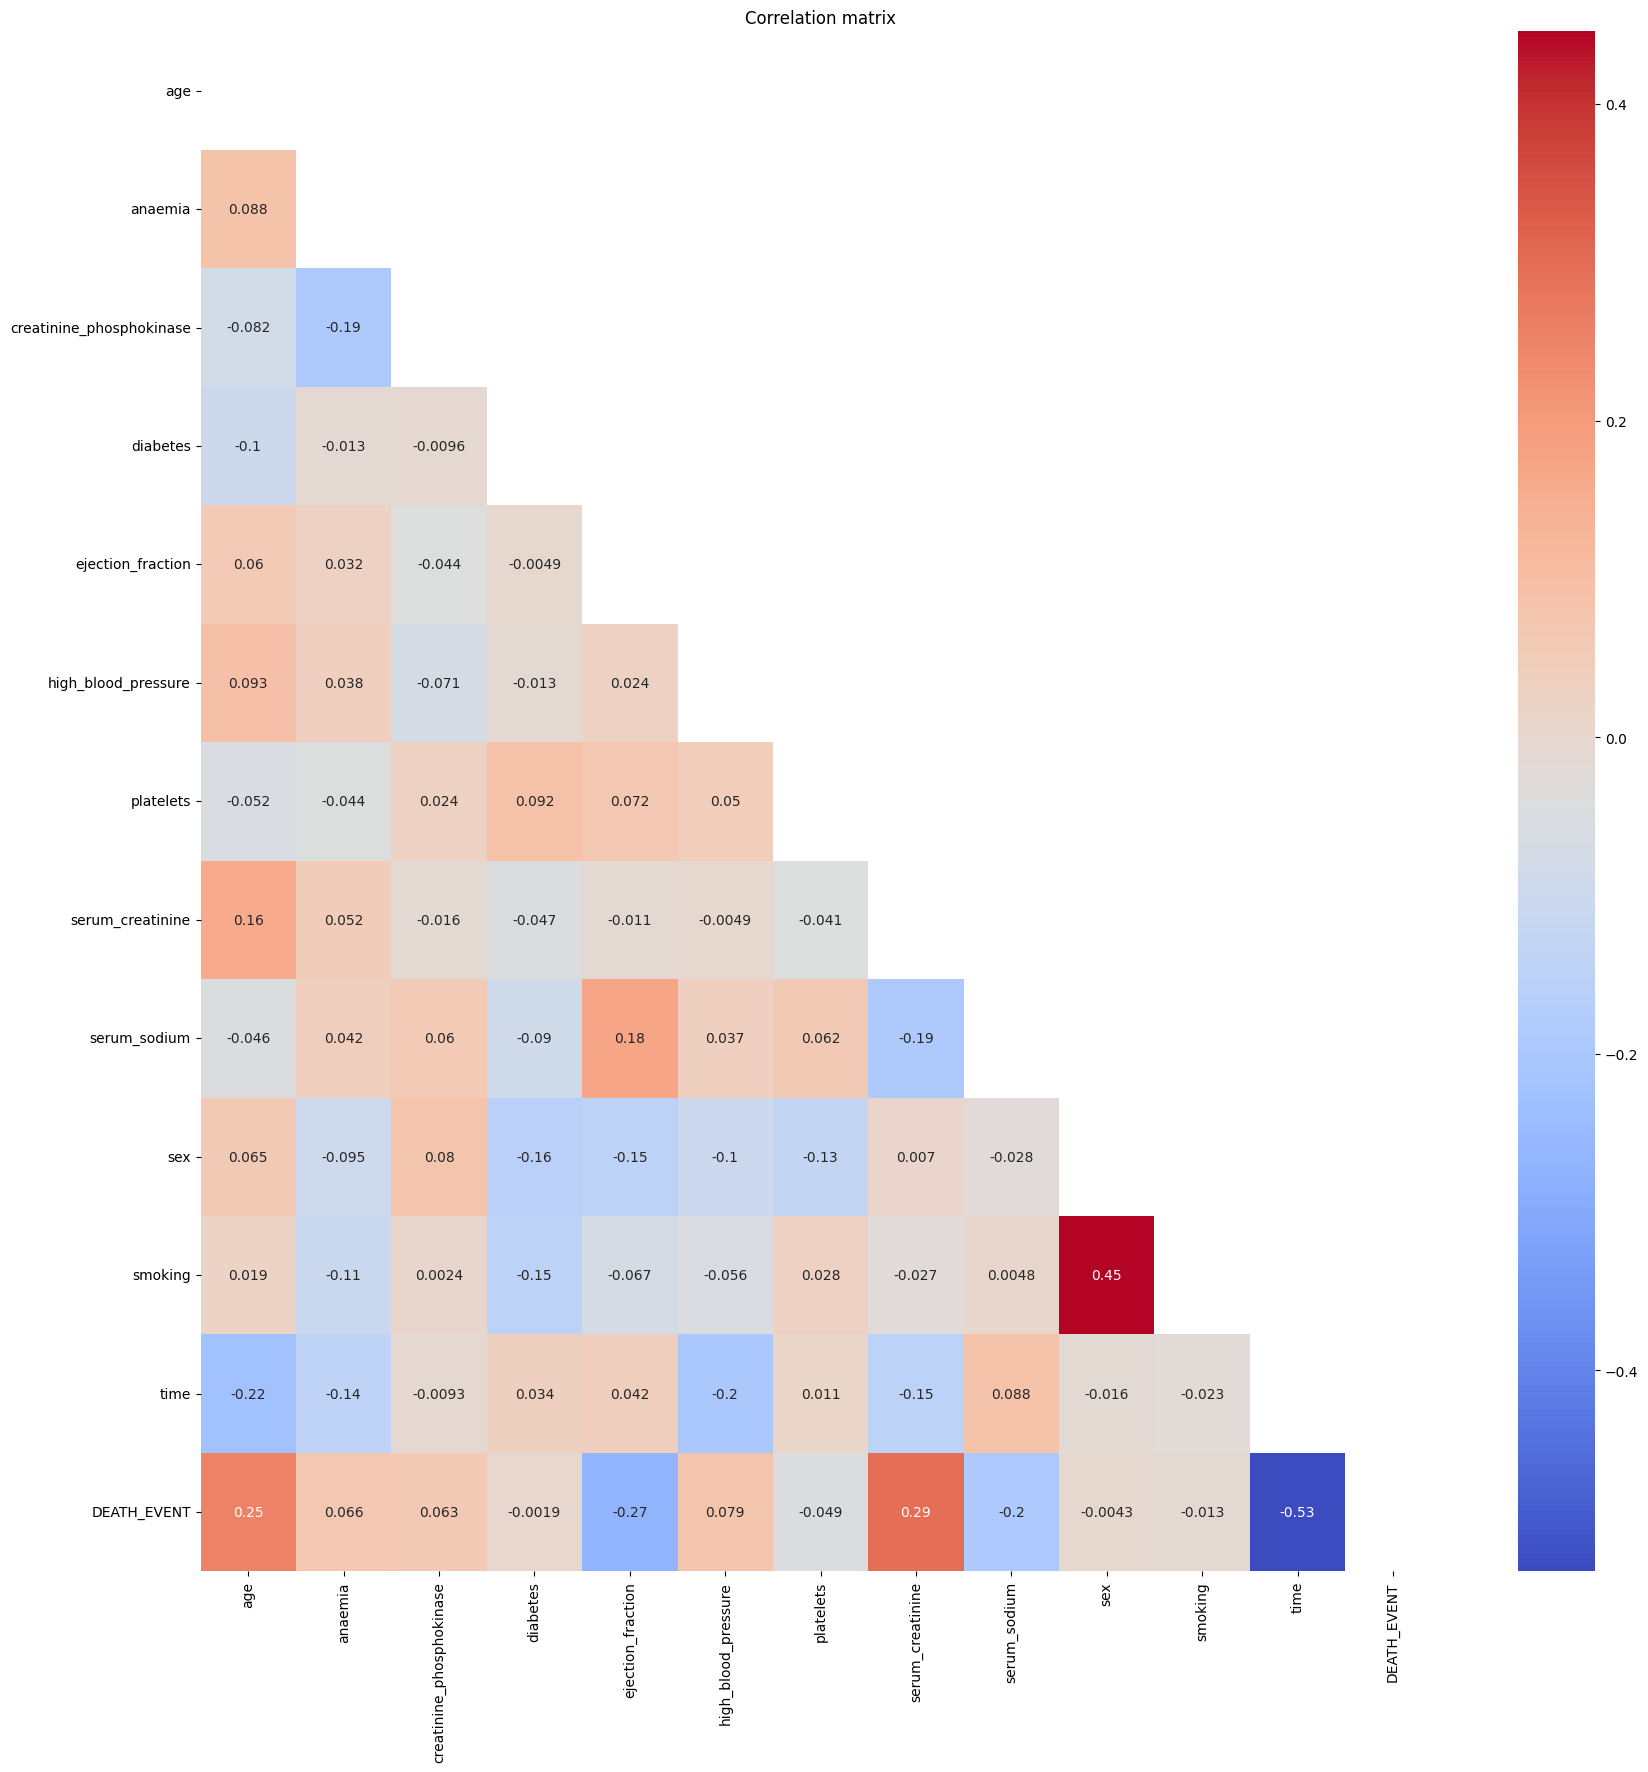

In [15]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

## Préparation de la modélisation -> preprocessing inclus

In [16]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [17]:
non_binary_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), non_binary_features),
        ('unchanged', 'passthrough', binary_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

In [20]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('unchanged', 'passthrough',
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('unchanged', 'passthrough',
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [23]:
y_pred = pipeline.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)

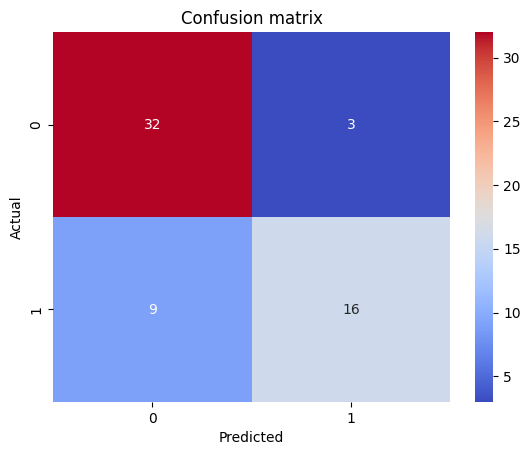

In [26]:
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(pipeline, X_test, y_test)
ExplainerDashboard(explainer).run()

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


splitting pipeline...
Detected sklearn/imblearn Pipeline and succesfully extracted final output dataframe with column names and final model...
Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predicti

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: 

AttributeError: 'tuple' object has no attribute 'tb_frame'

## Optimisation

In [28]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression(class_weight='balanced')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(estimator)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy : {accuracy}')

selected_features = X_train.columns[pipeline.named_steps['feature_selection'].support_]
print(f'Selected features : {selected_features}')

Accuracy : 0.7666666666666667
Selected features : Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_sodium', 'smoking'],
      dtype='object')
